<a href="https://colab.research.google.com/github/amitabhswain/MNIST_Image_Classification/blob/master/MNIST(NN_%26_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
# Libraries
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import random


In [ ]:
# Loading MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


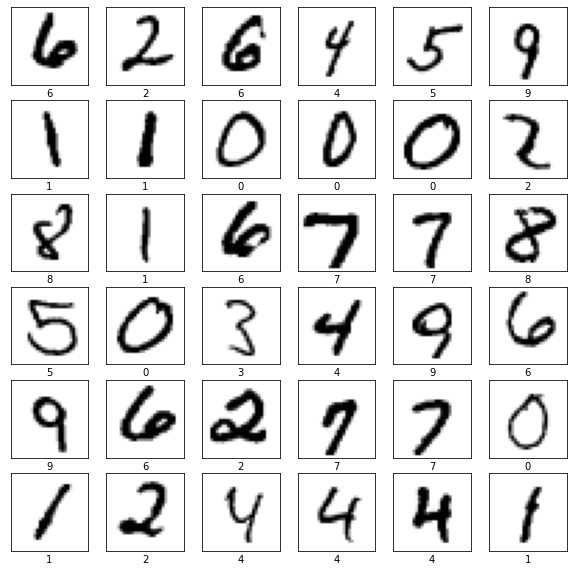

In [ ]:
# Visualize some of the images
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])


# Simple Neural Network


In [ ]:
# defining the NN model
def build_nn_model():
  nn_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
 ])
  return nn_model

model = build_nn_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3649 - accuracy: 0.8983
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1938 - accuracy: 0.9453
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1464 - accuracy: 0.9585
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1187 - accuracy: 0.9664
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0998 - accuracy: 0.9716


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('Test accuracy:', test_acc*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9669
Test accuracy: 96.68999910354614


#CNN
 

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
       
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            multiple                  240       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  7812      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  115328    
_________________________________________________________________
dense_5 (Dense)              multiple                 

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 37s 39ms/step - loss: 0.1801 - accuracy: 0.9462
Epoch 2/5
938/938 [==============================] - 37s 40ms/step - loss: 0.0554 - accuracy: 0.9834
Epoch 3/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 35s 38ms/step - loss: 0.0230 - accuracy: 0.9931


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc*100)

313/313 [==============================] - 3s 9ms/step - loss: 0.0296 - accuracy: 0.9911
Test accuracy: 99.1100013256073


In [ ]:
predictions = cnn_model.predict(test_images)

In [ ]:
predictions[0]

array([3.4334708e-09, 8.0532514e-10, 1.3019043e-07, 1.4190387e-06,
       2.0733517e-11, 8.6824370e-09, 1.9404807e-15, 9.9999845e-01,
       2.4774838e-09, 2.7265072e-08], dtype=float32)

In [ ]:
prediction = np.argmax(predictions[0]) 

print(prediction)

7


Label of this digit is: 7


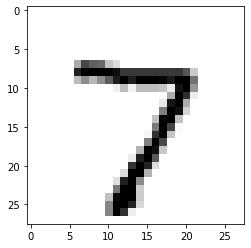

In [ ]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

# CNN seems to work well with MNIST dataset.